In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Soebel Operator for Edge Detection

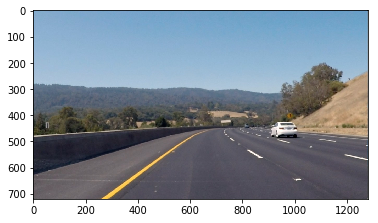

In [2]:
img = mpimg.imread("curved-lane.jpg")
plt.imshow(img)

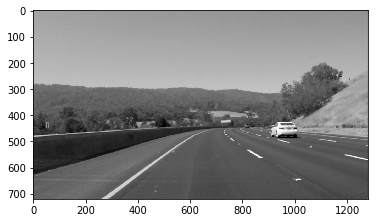

In [3]:
# convert the image to gray because cv2.Sobel takes a gray image!
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")

Text(0.5,1,'sybinary to get horizontal lines')

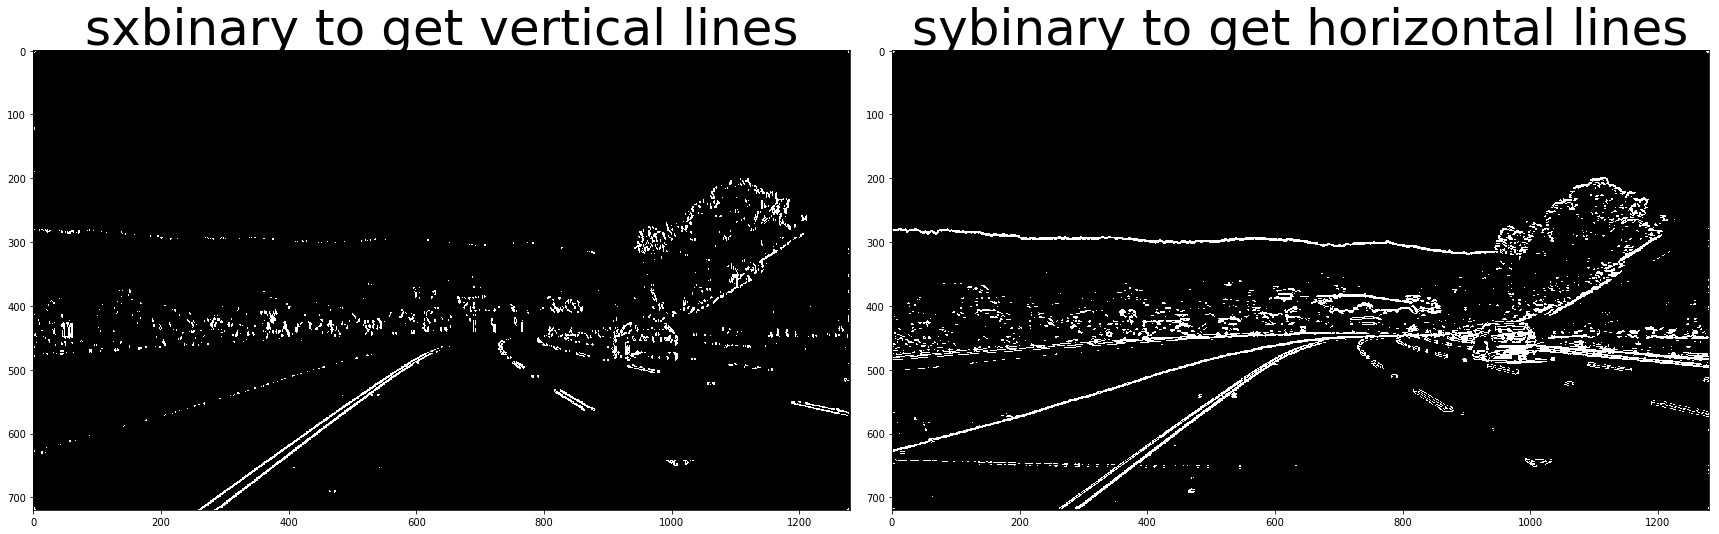

In [4]:
thresh_min = 20
thresh_max = 100

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
abs_sobelx = np.absolute(sobelx)
scaled_x_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
sxbinary = np.zeros_like(scaled_x_sobel)
sxbinary[(scaled_x_sobel >= thresh_min) & (scaled_x_sobel <= thresh_max)] = 1

sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
abs_sobely = np.absolute(sobely)
scaled_y_sobel = np.uint8(255*abs_sobely/np.max(abs_sobely))
sybinary = np.zeros_like(scaled_y_sobel)
sybinary[(scaled_y_sobel >= thresh_min) & (scaled_y_sobel <= thresh_max)] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(sxbinary, cmap='gray')
ax1.set_title('sxbinary to get vertical lines', fontsize=50)
ax2.imshow(sybinary, cmap='gray')
ax2.set_title('sybinary to get horizontal lines', fontsize=50)

## Let's define a function to perform abs Sobel

In [5]:
# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        dir_1 = 1
        dir_2 = 0
    elif orient == 'y':
        dir_1 = 0
        dir_2 = 1
    else:
        print("error: undefined orient!")
        return img
    sobel_orient = cv2.Sobel(gray, cv2.CV_64F, dir_1, dir_2, ksize=sobel_kernel)
    #print("sobel_orient", sobel_orient)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel_orient = np.absolute(sobel_orient)
    #print("abs_sobel_orient", abs_sobel_orient)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel_orient/np.max(abs_sobel_orient))
    #print("scaled_sobel", scaled_sobel)
    # 5) Create a mask of 1's where the scaled gradient magnitude is > thresh_min and < thresh_max
    binary_output = np.zeros_like(scaled_sobel) # prepare the output and fill with zeros
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    #print("binary_output", binary_output)
    return binary_output

In [6]:
# Now let's use the defined function abs_sobel_thresh()

Text(0.5,1,'Thresholded Gradient')

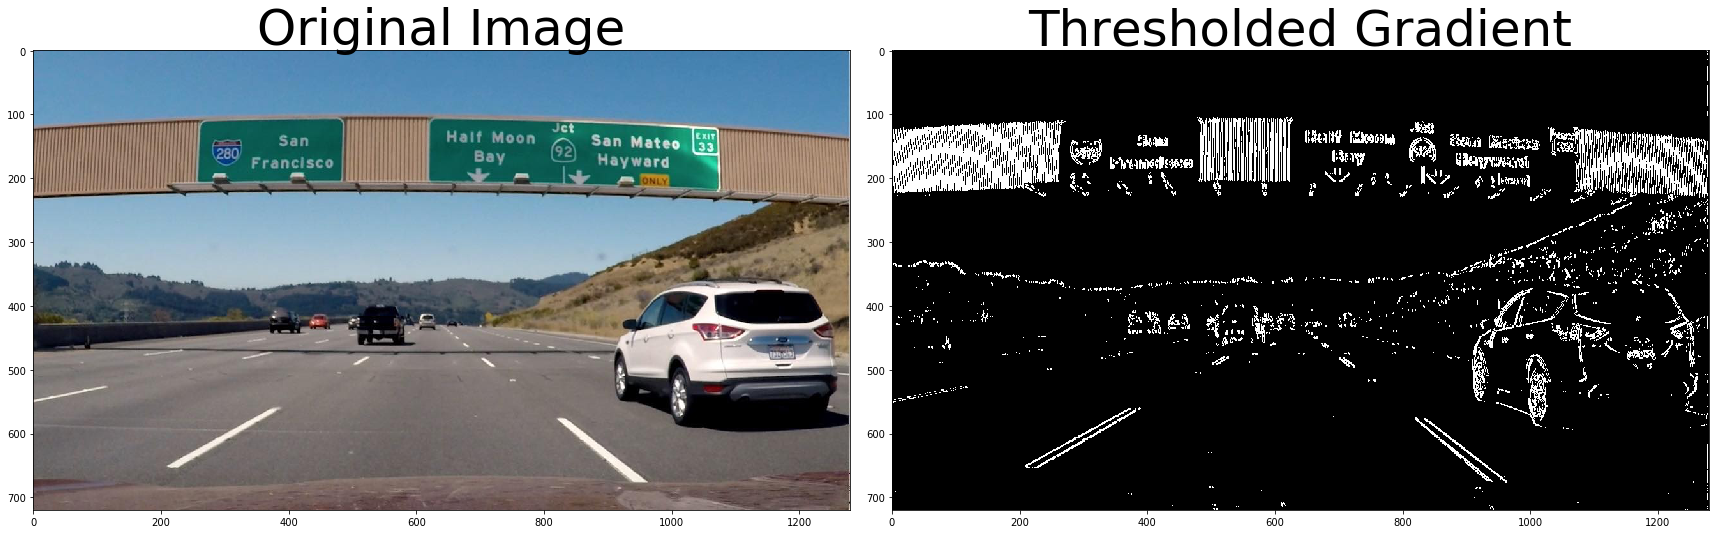

In [7]:
# Read in an image a new image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Note: calling your function with orient='x', thresh_min=50, thresh_max=100
# increasing the thresh_min will eliminate the edges with less gradient

# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh=(20, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)

## Get Magnitude of the Gradient => function mag_thresh()

The magnitude, or absolute value, of the gradient is just the square root of the squares of the individual x and y gradients. For a gradient in both the xx and yy directions, the magnitude is the square root of the sum of the squares.

abs_sobelx = sqrt{(sobel_x)^2}	 

abs_sobely = sqrt{(sobel_y)^2}	 

abs_sobelxy = sqrt{(sobel_x)^2+(sobel_y)^2}

It's also worth considering the size of the region in the image over which you'll be taking the gradient. You can modify the kernel size for the Sobel operator to change the size of this region. Taking the gradient over larger regions can smooth over noisy intensity fluctuations on small scales. The default Sobel kernel size is 3.

In [8]:
# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    sobel_mag = sobel_mag*255/np.max(sobel_mag)
    sobel_mag = sobel_mag.astype(np.uint8) 
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(sobel_mag) # prepare the output and fill with zeros
    binary_output[(sobel_mag >= thresh_min) & (sobel_mag <= thresh_max)] = 1
    # 6) Return this mask as your binary_output image
    return binary_output

In [9]:
# Now let's use the defined function mag_thresh()

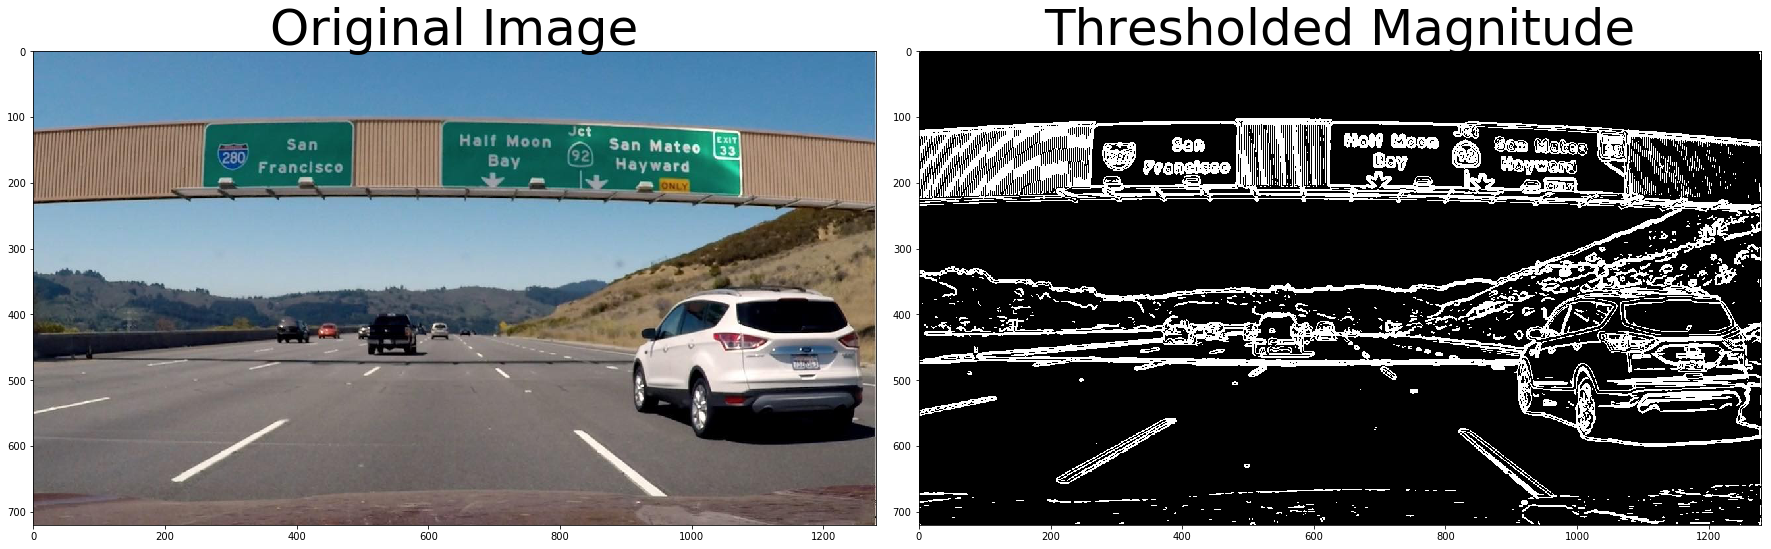

In [10]:
# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Run the function
mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Direction of the Gradient

The direction of the gradient is simply the inverse tangent (arctangent) of the yy gradient divided by the xx gradient:

arctan{(sobel_y/sobel_x)}

An orientation of 0 implies a vertical line and orientations of +/−π/2 imply horizontal lines.

In [11]:
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobel_x = np.absolute(sobel_x)
    abs_sobel_y = np.absolute(sobel_y)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    gradient_direction = np.arctan2(abs_sobel_y, abs_sobel_x)
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(gradient_direction) # prepare the output and fill with zeros
    binary_output[(gradient_direction >= thresh[0]) & (gradient_direction <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output

In [12]:
# Now let's use the defined function mag_thresh()

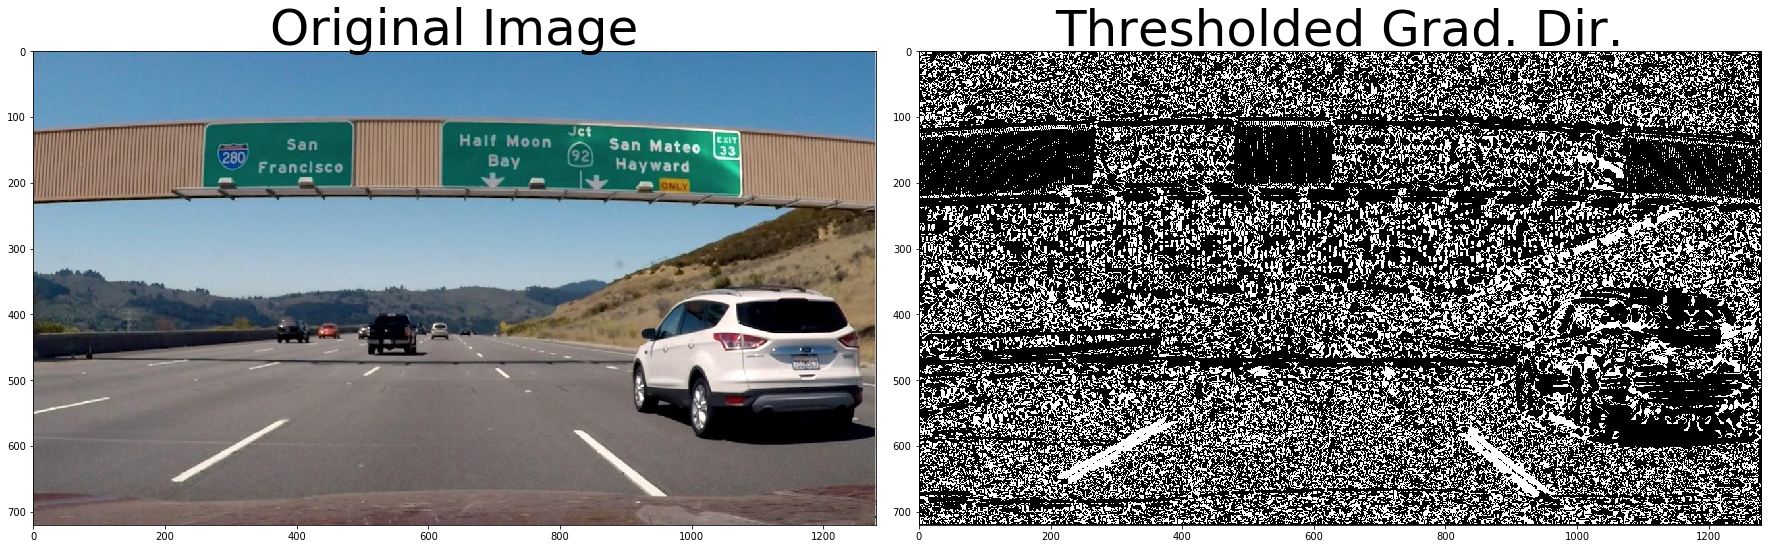

In [13]:
# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Combining Thresholds

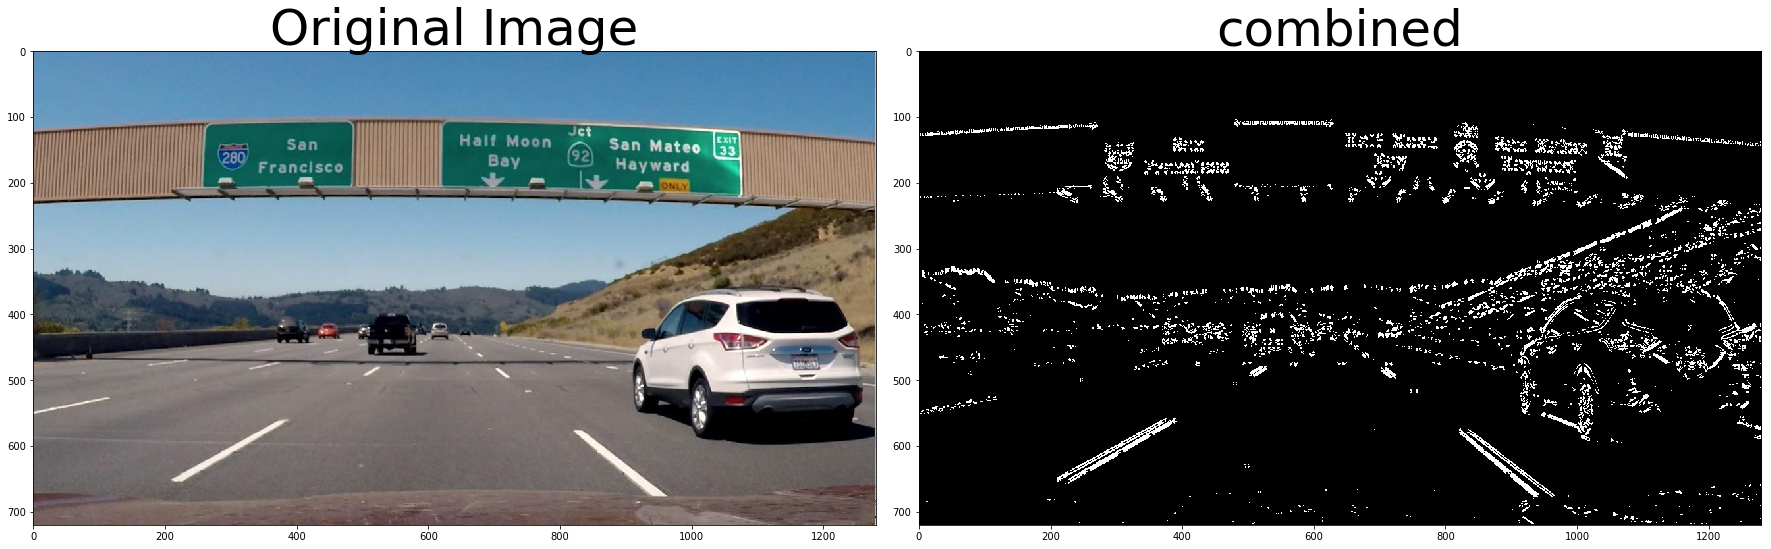

In [14]:
# Choose a Sobel kernel size
ksize = 9 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20, 100))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))

# combine thresholds together
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(combined, cmap='gray')
ax2.set_title('combined', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Color Spaces

Note: In OpenCV, for 8-bit images, the range of H is from 0-179. It's typically from 0-359 for degrees around the cylindrical colorspace, but this number is divided in half so that the range can be represented in an 8-bit image whose color values range from 0-255.

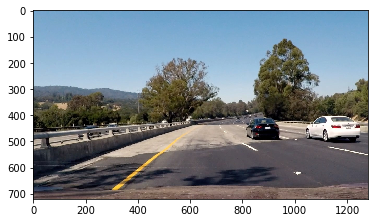

In [15]:
# Read in an image
im = mpimg.imread('colorspace_test_images/test4.jpg')
plt.imshow(im)

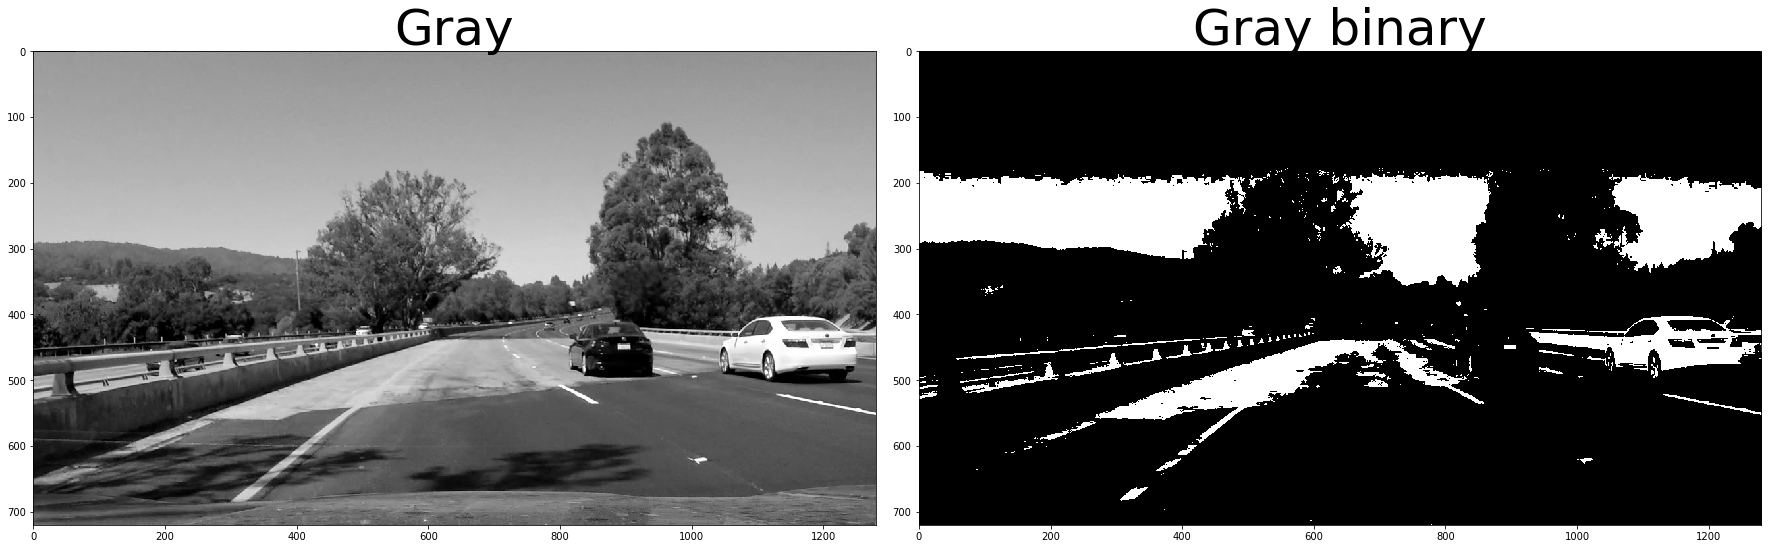

In [16]:
thresh = (180, 255)
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(gray, cmap='gray')
ax1.set_title('Gray', fontsize=50)
ax2.imshow(binary, cmap='gray')
ax2.set_title('Gray binary', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [17]:
# check the different channels of RGB

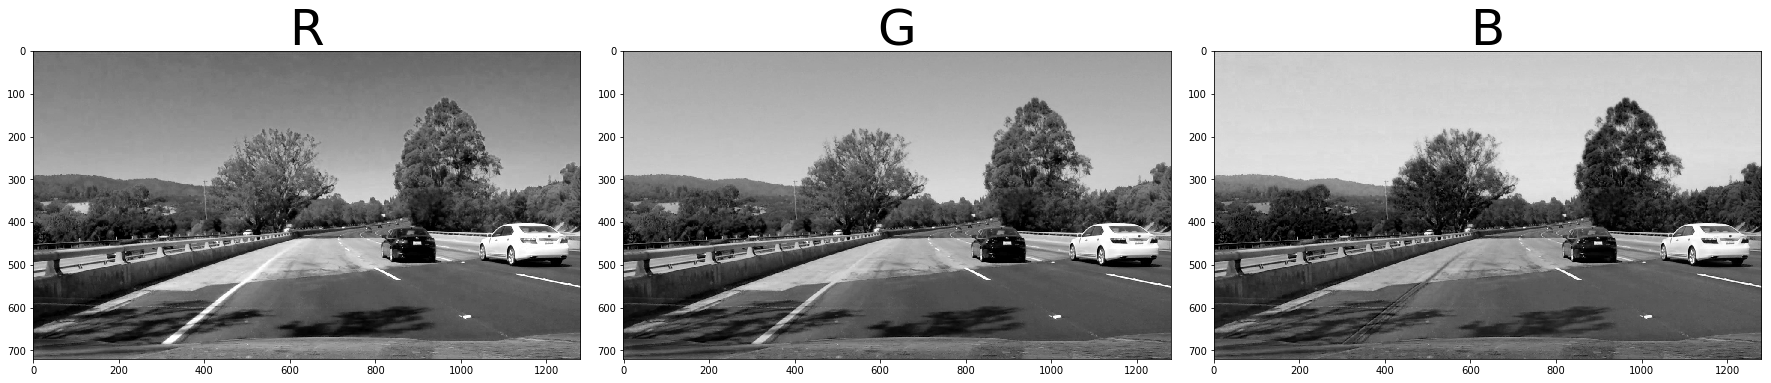

In [18]:
R = im[:,:,0]
G = im[:,:,1]
B = im[:,:,2]

# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(R, cmap='gray')
ax1.set_title('R', fontsize=50)
ax2.imshow(G, cmap='gray')
ax2.set_title('G', fontsize=50)
ax3.imshow(B, cmap='gray')
ax3.set_title('B', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


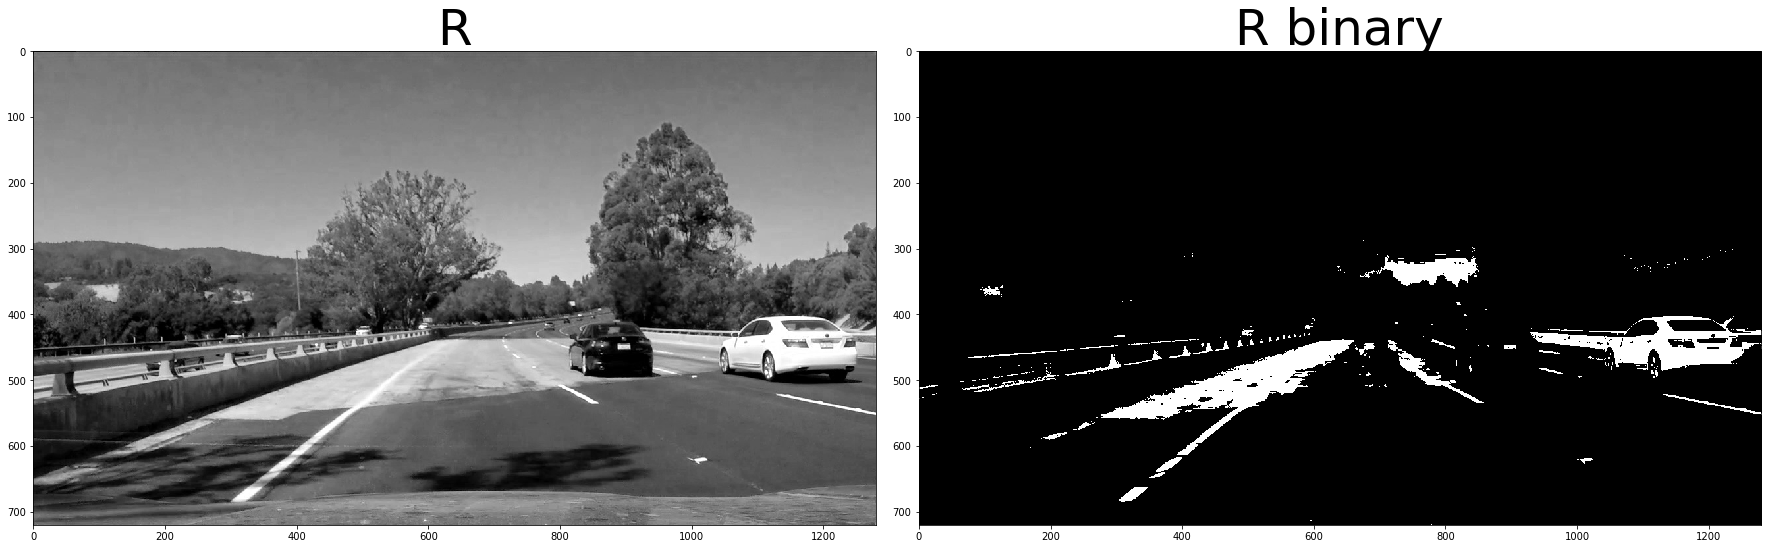

In [19]:
# apply threshold to get the lane lines in the R channel image
thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(R, cmap='gray')
ax1.set_title('R', fontsize=50)
ax2.imshow(binary, cmap='gray')
ax2.set_title('R binary', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [20]:
# check the different channels of HLS

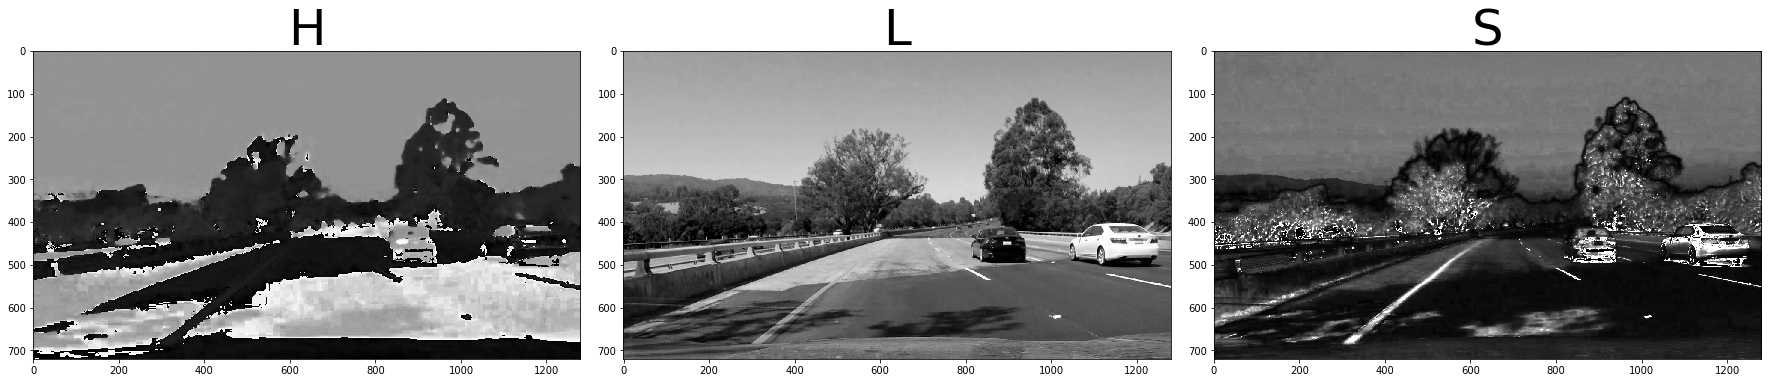

In [21]:
hls = cv2.cvtColor(im, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(H, cmap='gray')
ax1.set_title('H', fontsize=50)
ax2.imshow(L, cmap='gray')
ax2.set_title('L', fontsize=50)
ax3.imshow(S, cmap='gray')
ax3.set_title('S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


In [22]:
# S channel looks promising, so apply a threshold to get the lane lines

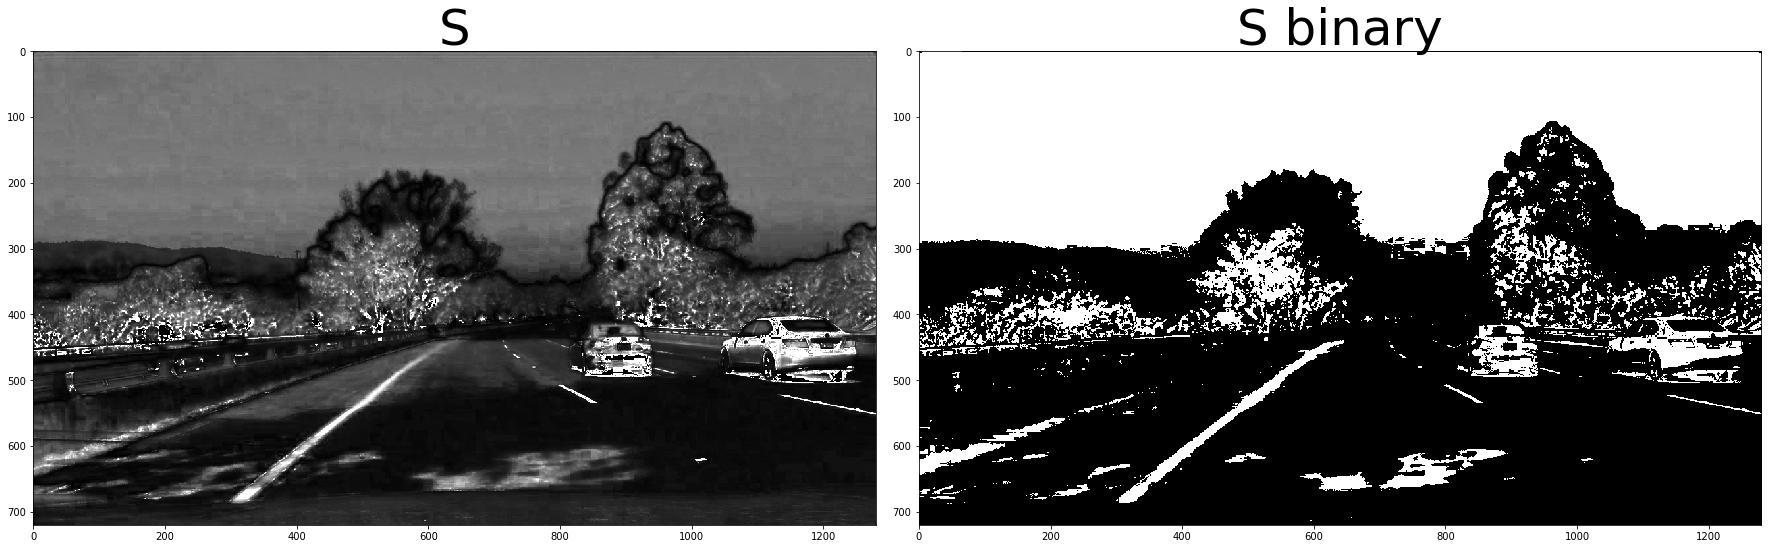

In [23]:
thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(S, cmap='gray')
ax1.set_title('S', fontsize=50)
ax2.imshow(binary, cmap='gray')
ax2.set_title('S binary', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

It's worth noting, however, that the R channel still does rather well on the white lines, perhaps even better than the S channel. As with gradients, it's worth considering how you might combine various color thresholds to make the most robust identification of the lines.